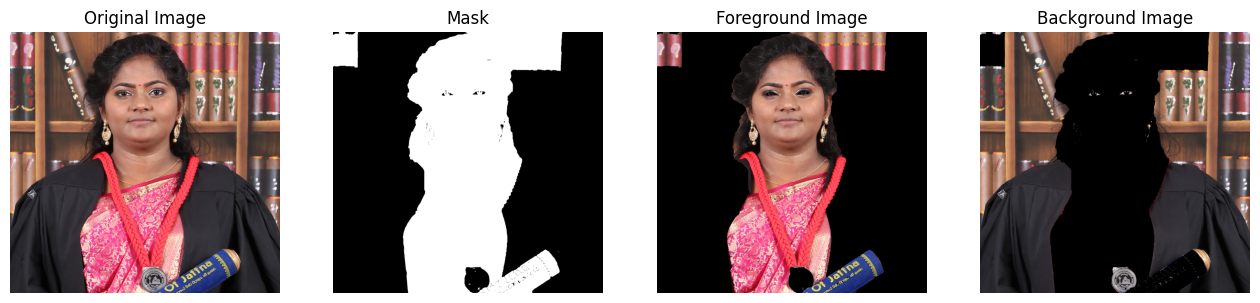

In [9]:
#q_9
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('images/flower.png', cv.IMREAD_COLOR)
im_original = im.copy()

mask = np.zeros(im.shape[:2], np.uint8)
h,w, c = im_original.shape
rect = (0, 0, h, w)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

f_mask = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = im*f_mask[:, :, np.newaxis]
b_mask = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = im*b_mask[:, :, np.newaxis]

cv.imshow('Image', im_bgd)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(f_mask, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
ax[3].axis("off")

plt.show()

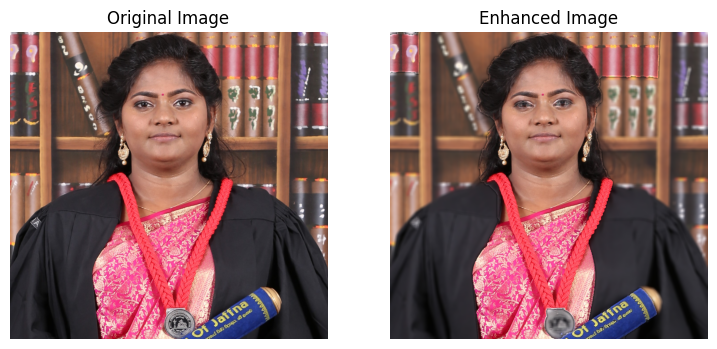

In [10]:
im_blurred = cv.blur(im_bgd, (15, 15))
im_enhanced = cv.add(im_blurred, im_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.show()